# 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:
#### 1. Importing libraries and data 
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "4"
import sklearn
from sklearn.cluster import KMeans # the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Define the path to the directory containing the file
path = r'C:\Users\melan\OneDrive\Career Foundry\World Happiness Report'

In [7]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\World Happiness Report'

In [8]:
# Import merged_df from the "02 Data/Prepared Data" directory
merged_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.csv'))

In [9]:
merged_df.shape

(782, 11)

In [10]:
merged_df.head()

,Unnamed: 0,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [11]:
#only use numerical columns from merged_df
numerical_df = merged_df.select_dtypes(include=['number'])

In [12]:
# Display the first few rows to verify
numerical_df.head()

,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [13]:
#but also we need to remove the Year column as this is a categorical column, we need to use only numerical columns for k-means clustering!
numerical_df = numerical_df.drop(columns=['Year'])


In [14]:
#verify the Year column is removed
numerical_df.head()

,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [15]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl]  # Set n_init explicitly to 10

In [16]:
score = [kmeans[i].fit(numerical_df).score(numerical_df) for i in range(len(kmeans))]

In [17]:
score

[-41446580.2860368,
 -11515880.425042368,
 -5969451.31231103,
 -4031167.23701977,
 -3189540.992315272,
 -2652499.2335072625,
 -2144245.2620375985,
 -1704019.4516200249,
 -1263194.7983202124]

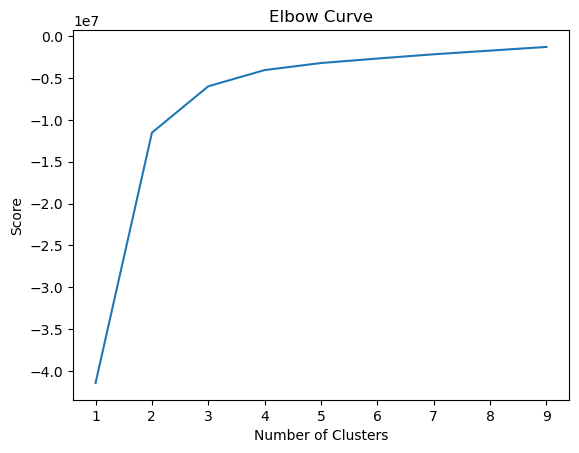

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this Elbow Curve chart, we can see there is a jump (elbow curve) from 2 to 3 and then it straightens out.  Our optimal count for clusters is 3.

### 3. k-means clustering

In [21]:
# Create the k-means object with n_init specified

kmeans = KMeans(n_clusters = 3, n_init=10) 

In [22]:
# Fit the k-means object to the data.

kmeans.fit(numerical_df)

KMeans(n_clusters=3, n_init=10)

In [23]:
# adding a 'clusters' column fitted with the kmeans
numerical_df['clusters'] = kmeans.fit_predict(numerical_df)

In [24]:
# verifying clusters column shows
numerical_df.head()

,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,clusters
0,0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


In [25]:
numerical_df['clusters'].value_counts()

clusters
0    264
1    260
2    258
Name: count, dtype: int64

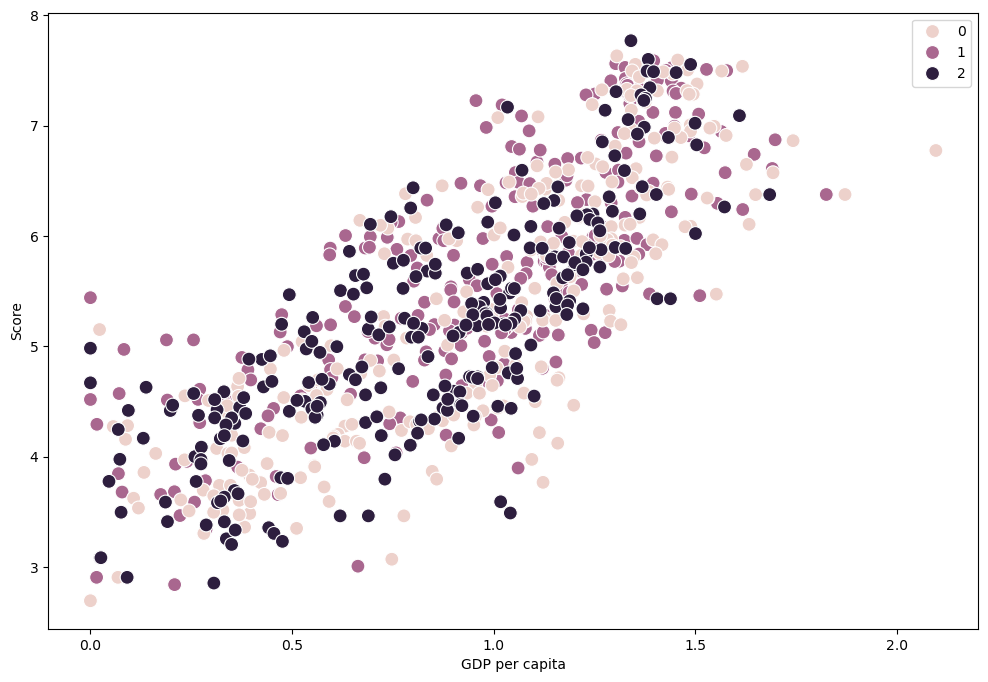

In [26]:
# Plot the clusters for the "Score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['GDP per capita'], y=numerical_df['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

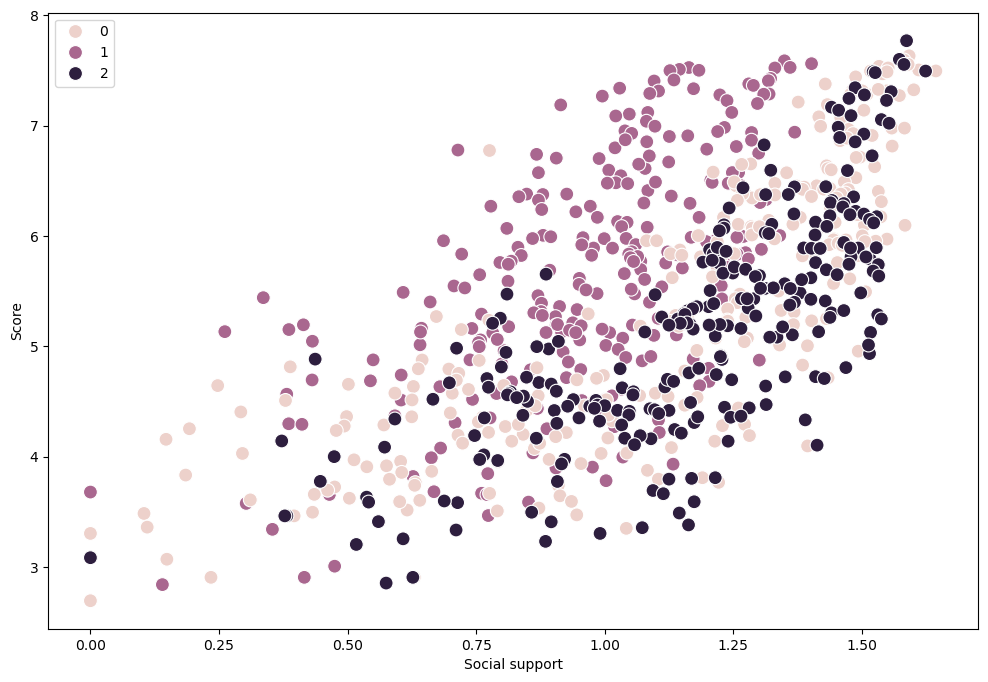

In [27]:
# Plot the clusters for the "Social support" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['Social support'], y=numerical_df['Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Social support') 
plt.ylabel('Score') 
plt.show()

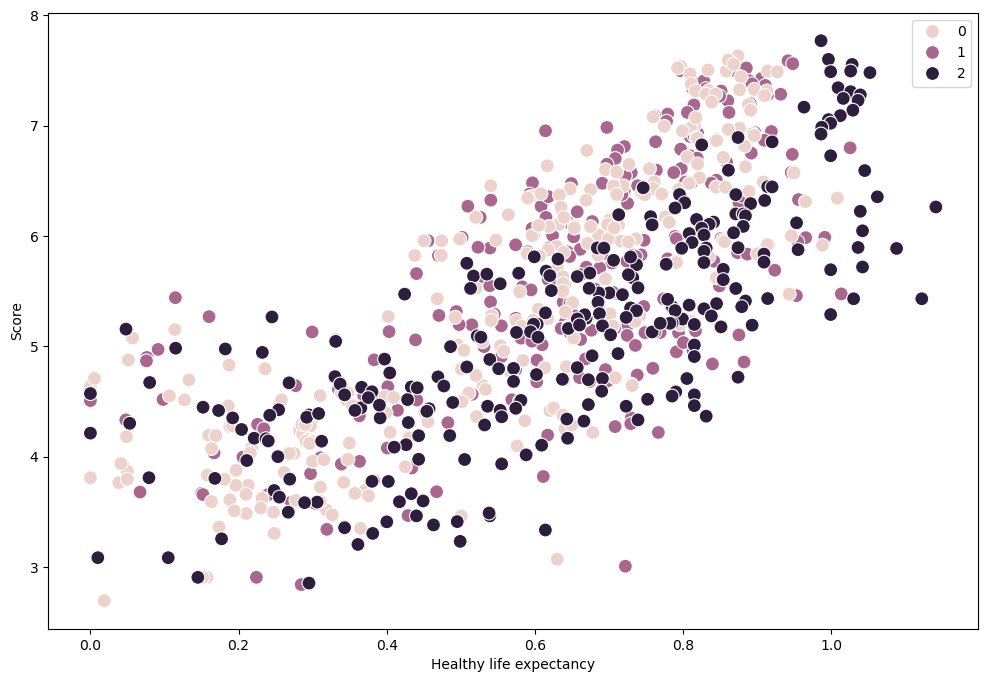

In [28]:
# Plot the clusters for the "Healthy life expectancy" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['Healthy life expectancy'], y=numerical_df['Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Healthy life expectancy') 
plt.ylabel('Score') 
plt.show()

##### Really thought there would some actual 'clusters' happening... this does not look organized into clusters at all... these charts are all just a mix of black, purple and pink... I'm going to try this just to see what I get

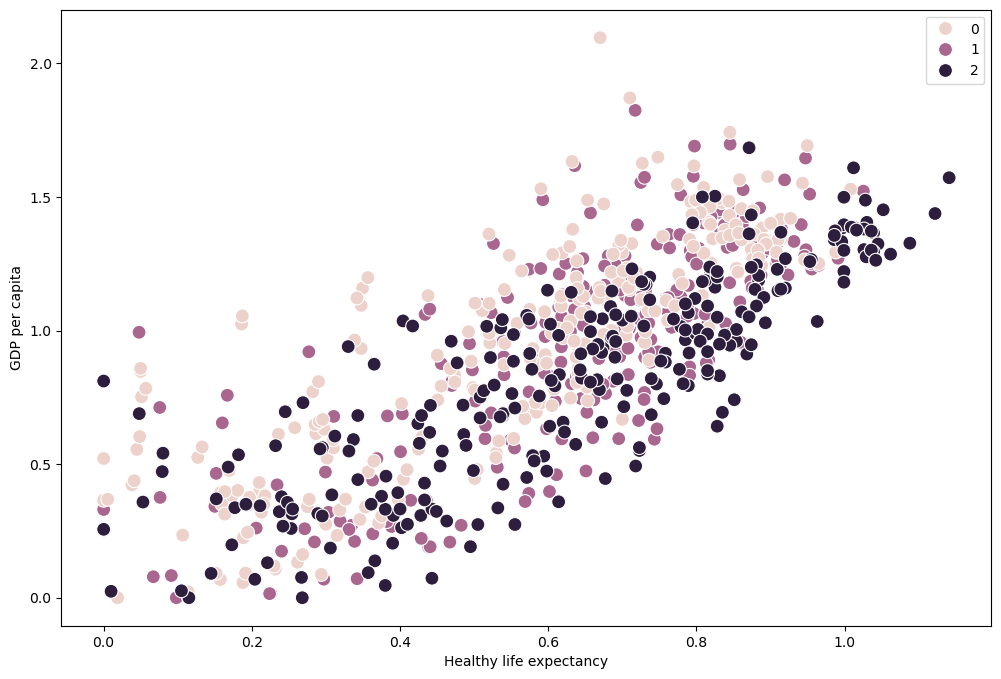

In [30]:
# Plot the clusters for the "Healthy life expectancy" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['Healthy life expectancy'], y=numerical_df['GDP per capita'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Healthy life expectancy') 
plt.ylabel('GDP per capita') 
plt.show()

##### Hmmm this is also just a crazy mix and no clusters :(

In [32]:
numerical_df.loc[numerical_df['clusters'] == 2, 'cluster'] = 'dark purple'
numerical_df.loc[numerical_df['clusters'] == 1, 'cluster'] = 'purple'
numerical_df.loc[numerical_df['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
numerical_df.groupby('cluster').agg({'Healthy life expectancy':['mean', 'median'], 
                         'Social support':['mean', 'median'], 
                         'GDP per capita':['mean', 'median'],
                          'Score':['mean', 'median']})

Healthy life expectancy           Social support            \
                               mean    median           mean    median   
cluster                                                                  
dark purple                0.633205  0.668000       1.163585  1.218000   
pink                       0.556207  0.616848       1.110540  1.234688   
purple                     0.648859  0.688995       0.961213  1.001760   

            GDP per capita               Score         
                      mean    median      mean median  
cluster                                                
dark purple       0.828659  0.880500  5.139806  5.168  
pink              0.948980  1.013000  5.351943  5.276  
purple            0.969325  1.033145  5.643881  5.692

Under Healthy life expectancy, we see the pink cluster has the highest median and mean values, countries in this cluster would maybe have a better life expectancy and higher happiness score for this reason.  Under Social support, we see the purple cluster has the highest median and mean values, so social support would have a higher happiness score in these countries.  Under GDP per capita, the dark purple cluster has the highest median and mean values, these countries could have a strong economy contributing to a higher happiness score.  For the (Happiness) Score, the pink cluster is the highest for both median and mean. The k-means clustering has been interesting, but can only be used with numerical data.... I can't see what countries there are or how they would fit into clusters. Further analysis will be needed.
These results could be useful for countries making policies in the areas of health care, economic growth, having a government people can trust and creating community within local groups. Happiness is an important part of life! 